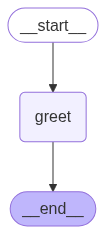

Hello, João!


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph

# estado: estrutura que vai conter toda informação necessária para que a aplicação rode como um todo
class AgentState(TypedDict):
    message: str

# nó: uma função que vai operar em cima do estado e vai retornar o próprio estado
def greet(state: AgentState) -> AgentState:
    state['message'] = "Hello, " + state['message'] + "!"
    # ao terminar, retorna o estado
    return state

# grafo: representa a aplicação e seus nós. Ele recebe o estado que funciona como o esquema.
graph = StateGraph(AgentState)
# agora podemos adicionar os nós: um nome e a função que representa o nó
graph.add_node("greet", greet)
# precisamos de um início e fim
# ele recebe o nome de um nó para demarcar o início e o fim. Neste caso, é o mesmo do nó criado acima.

# o grafo seria: start -> nó(greet) -> end

graph.set_entry_point("greet")
graph.set_finish_point("greet")

# por fim, compilamos o grafo
app = graph.compile()

# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))

result = app.invoke({"message": "João"})
print(result['message'])